In [3]:
import pandas as pd
import us
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
from collections import defaultdict
import random
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
worldcities = pd.read_csv('worldcities.csv')

In [5]:
worldcities = worldcities[worldcities['country'] == 'United States'].reset_index(drop=True)

In [6]:
worldcities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,La Jolla,La Jolla,32.8400,-117.276944,United States,US,USA,California,NaN,46781.0,NaN
1,New York,New York,40.6943,-73.924900,United States,US,USA,New York,NaN,18972871.0,1.840034e+09
2,Los Angeles,Los Angeles,34.1141,-118.406800,United States,US,USA,California,NaN,12121244.0,1.840020e+09
3,Chicago,Chicago,41.8375,-87.686600,United States,US,USA,Illinois,NaN,8595181.0,1.840000e+09
4,Miami,Miami,25.7840,-80.210100,United States,US,USA,Florida,NaN,5711945.0,1.840015e+09


In [7]:
base = 'https://clinicaltrials.gov/ct2/results/download_fields?'

In [8]:
cond = 'cond=HIV'
term = '&term=reverse&transcriptase&inhibitor'

In [9]:
format_qty = '&down_fmt=csv'

In [10]:
include_fields = '&down_flds=all' # This can be more restrictive, but I prefer to collect all fields and downselect from there.

location = '&cntry=US'

# To add states  -  &state=US%3AWA  - this is Washington
# To add cities  - &city=Seattle
# To add distance from city  - &dist=50
restrictions = '&recrs=ab&type=Intr'

# recrs=ab  -  this is recruiting status, a = recruiting, b = not yet recruiting, d = active not recruiting, e = completed
# age_v= (leaving blank places no restriction on age OR leave this field out of the url
# gndr= (leaving blank places no restriction on gender)
# type=Intr   - Intr is used to designate Interventional; Obsr is used for Observations; leaving blank places no restrictions on type
# phase=   - may be blank (no restrictions), 4 (early phase 1), 0 (phase 1), 1 (phase 2), 2 (phase 3), 3 (phase 4), or phase=0&phase=1 for combination
# rslt=   (With = has results; left blank or off the url means not restricted to; Without = no results)

In [11]:
path = (base+cond+term+format_qty+include_fields+location+restrictions)

In [12]:
path

'https://clinicaltrials.gov/ct2/results/download_fields?cond=HIV&term=reverse&transcriptase&inhibitor&down_fmt=csv&down_flds=all&cntry=US&recrs=ab&type=Intr'

In [13]:
df = pd.read_csv(path)

In [14]:
# df

In [15]:
df.Locations[0]

'University of Texas Southwestern Medical Center, Dallas, Texas, United States|University of Texas Southwestern, Dallas, Texas, United States'

In [16]:
color = ['#ff00ff', '#fe01ff', '#fd02ff', '#fc03ff', '#fb04ff', '#fa05ff', '#f906ff', '#f807ff', '#f708ff', '#f609ff', '#f50aff', '#f40bff', '#f30cff', '#f20dff', '#f10eff', '#f00fff', '#ef10ff', '#ee11ff', '#ed12ff', '#ec13ff', '#eb14ff', '#ea15ff', '#e916ff', '#e817ff', '#e718ff', '#e61aff', '#e41bff', '#e31cff', '#e21dff', '#e11eff', '#e01fff', '#df20ff', '#de21ff', '#dd22ff', '#dc23ff', '#db24ff', '#da25ff', '#d926ff', '#d827ff', '#d728ff', '#d629ff', '#d52aff', '#d42bff', '#d32cff', '#d22dff', '#d12eff', '#d02fff', '#cf30ff', '#ce31ff', '#cd32ff', '#cc33ff', '#cb34ff', '#ca35ff', '#c936ff', '#c837ff', '#c738ff', '#c639ff', '#c53aff', '#c43bff', '#c33cff', '#c23dff', '#c13eff', '#c03fff', '#bf40ff', '#be41ff', '#bd42ff', '#bc43ff', '#bb44ff', '#ba45ff', '#b946ff', '#b847ff', '#b748ff', '#b649ff', '#b54aff', '#b44bff', '#b34dff', '#b14eff', '#b04fff', '#af50ff', '#ae51ff', '#ad52ff', '#ac53ff', '#ab54ff', '#aa55ff', '#a956ff', '#a857ff', '#a758ff', '#a659ff', '#a55aff', '#a45bff', '#a35cff', '#a25dff', '#a15eff', '#a05fff', '#9f60ff', '#9e61ff', '#9d62ff', '#9c63ff', '#9b64ff', '#9a65ff', '#9966ff', '#9867ff', '#9768ff', '#9669ff', '#956aff', '#946bff', '#936cff', '#926dff', '#916eff', '#906fff', '#8f70ff', '#8e71ff', '#8d72ff', '#8c73ff', '#8b74ff', '#8a75ff', '#8976ff', '#8877ff', '#8778ff', '#8679ff', '#857aff', '#847bff', '#837cff', '#827dff', '#817eff', '#8080ff', '#7e81ff', '#7d82ff', '#7c83ff', '#7b84ff', '#7a85ff', '#7986ff', '#7887ff', '#7788ff', '#7689ff', '#758aff', '#748bff', '#738cff', '#728dff', '#718eff', '#708fff', '#6f90ff', '#6e91ff', '#6d92ff', '#6c93ff', '#6b94ff', '#6a95ff', '#6996ff', '#6897ff', '#6798ff', '#6699ff', '#659aff', '#649bff', '#639cff', '#629dff', '#619eff', '#609fff', '#5fa0ff', '#5ea1ff', '#5da2ff', '#5ca3ff', '#5ba4ff', '#5aa5ff', '#59a6ff', '#58a7ff', '#57a8ff', '#56a9ff', '#55aaff', '#54abff', '#53acff', '#52adff', '#51aeff', '#50afff', '#4fb0ff', '#4eb1ff', '#4db3ff', '#4bb4ff', '#4ab5ff', '#49b6ff', '#48b7ff', '#47b8ff', '#46b9ff', '#45baff', '#44bbff', '#43bcff', '#42bdff', '#41beff', '#40bfff', '#3fc0ff', '#3ec1ff', '#3dc2ff', '#3cc3ff', '#3bc4ff', '#3ac5ff', '#39c6ff', '#38c7ff', '#37c8ff', '#36c9ff', '#35caff', '#34cbff', '#33ccff', '#32cdff', '#31ceff', '#30cfff', '#2fd0ff', '#2ed1ff', '#2dd2ff', '#2cd3ff', '#2bd4ff', '#2ad5ff', '#29d6ff', '#28d7ff', '#27d8ff', '#26d9ff', '#25daff', '#24dbff', '#23dcff', '#22ddff', '#21deff', '#20dfff', '#1fe0ff', '#1ee1ff', '#1de2ff', '#1ce3ff', '#1be4ff', '#1ae6ff', '#18e7ff', '#17e8ff', '#16e9ff', '#15eaff', '#14ebff', '#13ecff', '#12edff', '#11eeff', '#10efff', '#0ff0ff', '#0ef1ff', '#0df2ff', '#0cf3ff', '#0bf4ff', '#0af5ff', '#09f6ff', '#08f7ff', '#07f8ff', '#06f9ff', '#05faff', '#04fbff', '#03fcff', '#02fdff', '#01feff', '#00ffff', '#01fffe', '#02fefd', '#03fefc', '#04fefb', '#05fdfa', '#06fdf9', '#07fcf8', '#08fcf7', '#09fcf6', '#0afbf5', '#0bfbf4', '#0cfbf3', '#0dfaf2', '#0efaf1', '#0ffaf0', '#10f9ef', '#11f9ee', '#12f9ed', '#13f8ec', '#14f8eb', '#15f7ea', '#16f7e9', '#17f7e8', '#18f6e7', '#1af6e5', '#1bf6e4', '#1cf5e3', '#1df5e2', '#1ef5e1', '#1ff4e0', '#20f4df', '#21f3de', '#22f3dd', '#23f3dc', '#24f2db', '#25f2da', '#26f2d9', '#27f1d8', '#28f1d7', '#29f1d6', '#2af0d5', '#2bf0d4', '#2cf0d3', '#2defd2', '#2eefd1', '#2feed0', '#30eecf', '#31eece', '#32edcd', '#33edcc', '#34edcb', '#35ecca', '#36ecc9', '#37ecc8', '#38ebc7', '#39ebc6', '#3aeac5', '#3beac4', '#3ceac3', '#3de9c2', '#3ee9c1', '#3fe9c0', '#40e8bf', '#41e8be', '#42e8bd', '#43e7bc', '#44e7bb', '#45e7ba', '#46e6b9', '#47e6b8', '#48e5b7', '#49e5b6', '#4ae5b5', '#4be4b4', '#4de4b3', '#4ee4b1', '#4fe3b0', '#50e3af', '#51e3ae', '#52e2ad', '#53e2ac', '#54e1ab', '#55e1aa', '#56e1a9', '#57e0a8', '#58e0a7', '#59e0a6', '#5adfa5', '#5bdfa4', '#5cdfa3', '#5ddea2', '#5edea1', '#5fdea0', '#60dd9f', '#61dd9e', '#62dc9d', '#63dc9c', '#64dc9b', '#65db9a', '#66db99', '#67db98', '#68da97', '#69da96', '#6ada95', '#6bd994', '#6cd993', '#6dd892', '#6ed891', '#6fd890', '#70d78f', '#71d78e', '#72d78d', '#73d68c', '#74d68b', '#75d68a', '#76d589', '#77d588', '#78d587', '#79d486', '#7ad485', '#7bd384', '#7cd383', '#7dd382', '#7ed281', '#80d280', '#81d27e', '#82d17d', '#83d17c', '#84d17b', '#85d07a', '#86d079', '#87cf78', '#88cf77', '#89cf76', '#8ace75', '#8bce74', '#8cce73', '#8dcd72', '#8ecd71', '#8fcd70', '#90cc6f', '#91cc6e', '#92cc6d', '#93cb6c', '#94cb6b', '#95ca6a', '#96ca69', '#97ca68', '#98c967', '#99c966', '#9ac965', '#9bc864', '#9cc863', '#9dc862', '#9ec761', '#9fc760', '#a0c65f', '#a1c65e', '#a2c65d', '#a3c55c', '#a4c55b', '#a5c55a', '#a6c459', '#a7c458', '#a8c457', '#a9c356', '#aac355', '#abc354', '#acc253', '#adc252', '#aec151', '#afc150', '#b0c14f', '#b1c04e', '#b3c04d', '#b4c04b', '#b5bf4a', '#b6bf49', '#b7bf48', '#b8be47', '#b9be46', '#babd45', '#bbbd44', '#bcbd43', '#bdbc42', '#bebc41', '#bfbc40', '#c0bb3f', '#c1bb3e', '#c2bb3d', '#c3ba3c', '#c4ba3b', '#c5ba3a', '#c6b939', '#c7b938', '#c8b837', '#c9b836', '#cab835', '#cbb734', '#ccb733', '#cdb732', '#ceb631', '#cfb630', '#d0b62f', '#d1b52e', '#d2b52d', '#d3b42c', '#d4b42b', '#d5b42a', '#d6b329', '#d7b328', '#d8b327', '#d9b226', '#dab225', '#dbb224', '#dcb123', '#ddb122', '#deb121', '#dfb020', '#e0b01f', '#e1af1e', '#e2af1d', '#e3af1c', '#e4ae1b', '#e5ae1a', '#e7ae18', '#e8ad17', '#e9ad16', '#eaad15', '#ebac14', '#ecac13', '#edab12', '#eeab11', '#efab10', '#f0aa0f', '#f1aa0e', '#f2aa0d', '#f3a90c', '#f4a90b', '#f5a90a', '#f6a809', '#f7a808', '#f8a807', '#f9a706', '#faa705', '#fba604', '#fca603', '#fda602', '#fea501', '#fffedf', '#fffddf', '#fffcde', '#fffbde', '#fffadd', '#fff9dd', '#fff8dc', '#fff7dc', '#fff6db', '#fff5db', '#fff4da', '#fff3da', '#fff2d9', '#fff1d9', '#fff0d8', '#ffefd8', '#ffeed7', '#ffedd7', '#ffecd6', '#ffebd6', '#ffead5', '#ffe9d5', '#ffe8d4', '#ffe7d4', '#ffe6d3', '#ffe4d2', '#ffe3d2', '#ffe2d1', '#ffe1d1', '#ffe0d0', '#ffdfd0', '#ffdecf', '#ffddcf', '#ffdcce', '#ffdbce', '#ffdacd', '#ffd9cd', '#ffd8cc', '#ffd7cc', '#ffd6cb', '#ffd5cb', '#ffd4ca', '#ffd3ca', '#ffd2c9', '#ffd1c9', '#ffd0c8', '#ffcfc8', '#ffcec7', '#ffcdc7', '#ffccc6', '#ffcbc5', '#ffcac5', '#ffc9c4', '#ffc8c4', '#ffc7c3', '#ffc6c3', '#ffc5c2', '#ffc4c2', '#ffc3c1', '#ffc2c1', '#ffc1c0', '#ffc0c0', '#ffbfbf', '#ffbebf', '#ffbdbe', '#ffbcbe', '#ffbbbd', '#ffbabd', '#ffb9bc', '#ffb8bc', '#ffb7bb', '#ffb6bb', '#ffb5ba', '#ffb4ba', '#ffb3b9', '#ffb1b8', '#ffb0b8', '#ffafb7', '#ffaeb7', '#ffadb6', '#ffacb6', '#ffabb5', '#ffaab5', '#ffa9b4', '#ffa8b4', '#ffa7b3', '#ffa6b3', '#ffa5b2', '#ffa4b2', '#ffa3b1', '#ffa2b1', '#ffa1b0', '#ffa0b0', '#ff9faf', '#ff9eaf', '#ff9dae', '#ff9cae', '#ff9bad', '#ff9aad', '#ff99ac', '#ff98ab', '#ff97ab', '#ff96aa', '#ff95aa', '#ff94a9', '#ff93a9', '#ff92a8', '#ff91a8', '#ff90a7', '#ff8fa7', '#ff8ea6', '#ff8da6', '#ff8ca5', '#ff8ba5', '#ff8aa4', '#ff89a4', '#ff88a3', '#ff87a3', '#ff86a2', '#ff85a2', '#ff84a1', '#ff83a1', '#ff82a0', '#ff81a0', '#ff809f', '#ff7e9e', '#ff7d9e', '#ff7c9d', '#ff7b9d', '#ff7a9c', '#ff799c', '#ff789b', '#ff779b', '#ff769a', '#ff759a', '#ff7499', '#ff7399', '#ff7298', '#ff7198', '#ff7097', '#ff6f97', '#ff6e96', '#ff6d96', '#ff6c95', '#ff6b95', '#ff6a94', '#ff6994', '#ff6893', '#ff6793', '#ff6692', '#ff6591', '#ff6491', '#ff6390', '#ff6290', '#ff618f', '#ff608f', '#ff5f8e', '#ff5e8e', '#ff5d8d', '#ff5c8d', '#ff5b8c', '#ff5a8c', '#ff598b', '#ff588b', '#ff578a', '#ff568a', '#ff5589', '#ff5489', '#ff5388', '#ff5288', '#ff5187', '#ff5087', '#ff4f86', '#ff4e86', '#ff4d85', '#ff4b84', '#ff4a84', '#ff4983', '#ff4883', '#ff4782', '#ff4682', '#ff4581', '#ff4481', '#ff4380', '#ff4280', '#ff417f', '#ff407f', '#ff3f7e', '#ff3e7e', '#ff3d7d', '#ff3c7d', '#ff3b7c', '#ff3a7c', '#ff397b', '#ff387b', '#ff377a', '#ff367a', '#ff3579', '#ff3479', '#ff3378', '#ff3277', '#ff3177', '#ff3076', '#ff2f76', '#ff2e75', '#ff2d75', '#ff2c74', '#ff2b74', '#ff2a73', '#ff2973', '#ff2872', '#ff2772', '#ff2671', '#ff2571', '#ff2470', '#ff2370', '#ff226f', '#ff216f', '#ff206e', '#ff1f6e', '#ff1e6d', '#ff1d6d', '#ff1c6c', '#ff1b6c', '#ff1a6b', '#ff186a', '#ff176a', '#ff1669', '#ff1569', '#ff1468', '#ff1368', '#ff1267', '#ff1167', '#ff1066', '#ff0f66', '#ff0e65', '#ff0d65', '#ff0c64', '#ff0b64', '#ff0a63', '#ff0963', '#ff0862', '#ff0762', '#ff0661', '#ff0561', '#ff0460', '#ff0360', '#ff025f', '#ff015f', '#ff005e', '#ff005e', '#fe005e', '#fe005e', '#fd005d', '#fd005d', '#fc005d', '#fc005d', '#fc005d', '#fb005d', '#fb005d', '#fa005c', '#fa005c', '#f9005c', '#f9005c', '#f9005c', '#f8005c', '#f8005c', '#f7005b', '#f7005b', '#f6005b', '#f6005b', '#f5005b', '#f5005b', '#f5005b', '#f4005a', '#f4005a', '#f3005a', '#f3005a', '#f2005a', '#f2005a', '#f2005a', '#f10059', '#f10059', '#f00059', '#f00059', '#ef0059', '#ef0059', '#ef0059', '#ee0058', '#ee0058', '#ed0058', '#ed0058', '#ec0058', '#ec0058', '#ec0058', '#eb0057', '#eb0057', '#ea0057', '#ea0057', '#e90057', '#e90057', '#e90057', '#e80056', '#e80056', '#e70056', '#e70056', '#e60056', '#e60056', '#e60056', '#e50055', '#e50055', '#e40055', '#e40055', '#e30055', '#e30055', '#e20054', '#e20054', '#e20054', '#e10054', '#e10054', '#e00054', '#e00054', '#df0053', '#df0053', '#df0053', '#de0053', '#de0053', '#dd0053', '#dd0053', '#dc0052', '#dc0052', '#dc0052', '#db0052', '#db0052', '#da0052', '#da0052', '#d90051', '#d90051', '#d90051', '#d80051', '#d80051', '#d70051', '#d70051', '#d60050', '#d60050', '#d60050', '#d50050', '#d50050', '#d40050', '#d40050', '#d3004f', '#d3004f', '#d3004f', '#d2004f', '#d2004f', '#d1004f', '#d1004f', '#d0004e', '#d0004e', '#cf004e', '#cf004e', '#cf004e', '#ce004e', '#ce004e', '#cd004d', '#cd004d', '#cc004d', '#cc004d', '#cc004d', '#cb004d', '#cb004d', '#ca004c', '#ca004c', '#c9004c', '#c9004c', '#c9004c', '#c8004c', '#c8004c', '#c7004b', '#c7004b', '#c6004b', '#c6004b', '#c6004b', '#c5004b', '#c5004b', '#c4004a', '#c4004a', '#c3004a', '#c3004a', '#c3004a', '#c2004a', '#c2004a', '#c10049', '#c10049', '#c00049', '#c00049', '#bf0049', '#bf0049', '#bf0049', '#be0048', '#be0048', '#bd0048', '#bd0048', '#bc0048', '#bc0048', '#bc0048', '#bb0047', '#bb0047', '#ba0047', '#ba0047', '#b90047', '#b90047', '#b90047', '#b80046', '#b80046', '#b70046', '#b70046', '#b60046', '#b60046', '#b60046', '#b50045', '#b50045', '#b40045', '#b40045', '#b30045', '#b30045', '#b30045', '#b20044', '#b20044', '#b10044', '#b10044', '#b00044', '#b00044', '#b00044', '#af0043', '#af0043', '#ae0043', '#ae0043', '#ad0043', '#ad0043', '#ac0042', '#ac0042', '#ac0042', '#ab0042', '#ab0042', '#aa0042', '#aa0042', '#a90041', '#a90041', '#a90041', '#a80041', '#a80041', '#a70041', '#a70041', '#a60040', '#a60040', '#a60040', '#a50040', '#a50040', '#a40040', '#a40040', '#a3003f', '#a3003f', '#a3003f', '#a2003f', '#a2003f', '#a1003f', '#a1003f', '#a0003e', '#a0003e', '#a0003e', '#9f003e', '#9f003e', '#9e003e', '#9e003e', '#9d003d', '#9d003d', '#9d003d', '#9c003d', '#9c003d', '#9b003d', '#9b003d', '#9a003c', '#9a003c', '#99003c', '#99003c', '#99003c', '#98003c', '#98003c', '#97003b', '#97003b', '#96003b', '#96003b', '#96003b', '#95003b', '#95003b', '#94003a', '#94003a', '#93003a', '#93003a']

In [17]:
increment = int(len(color)/len(df))

In [18]:
# len(df), len(color[::increment][:len(df)])

In [19]:
df['Color'] = random.sample(color[::increment][:len(df)], len(color[::increment][:len(df)]))

In [20]:
# df.Locations[0].split('|')

In [21]:
df.Locations = [df.Locations[i].split('|') for i in range(len(df.Locations))]

In [22]:
# df.Locations[0]

In [23]:
df = df.explode('Locations').reset_index(drop=True)

In [24]:
df.Locations = [df.Locations[i].split(',') for i in range(len(df.Locations))]

In [25]:
facilities = [df.Locations[i][0] for i in range(len(df.Locations))]

In [26]:
df['Facilities'] = facilities

In [27]:
# [print(df.Locations[i][1:]) for i in range(len(df.Locations))]

In [28]:
country = [df.Locations[i][-1][1:] for i in range(len(df.Locations))]

In [29]:
df['Country'] = country

In [30]:
df = df[df['Country'] == 'United States'].reset_index(drop=True)

In [31]:
geotemp = [df.Locations[i][1:-1] for i in range(len(df.Locations))]

df['City'] = [[df.Locations[i][1:-1] for i in range(len(df.Locations))][j][-2][1:] for j in range(len(df.Locations))]

In [32]:
cities = [geotemp[i][-2][1:] for i in range(len(geotemp))]
state = [geotemp[i][-1][1:] for i in range(len(geotemp))]

In [33]:
df['City'] = cities
df['State'] = state

In [34]:
df

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Color,Facilities,Country,City,State
0,1,NCT04820933,Doravirine Versus Integrase Inhibitors on Back...,NaN,Not yet recruiting,No Results Available,HIV I Infection|Cardiovascular Risk Factor|Lip...,Drug: Doravirine 100 Mg,HDL function|Monocyte chemotaxis|Monocyte deri...,University of Texas Southwestern Medical Cente...,...,NaN,"October 3, 2023",[University of Texas Southwestern Medical Cent...,NaN,https://ClinicalTrials.gov/show/NCT04820933,#ffaeb7,University of Texas Southwestern Medical Center,United States,Dallas,Texas
1,1,NCT04820933,Doravirine Versus Integrase Inhibitors on Back...,NaN,Not yet recruiting,No Results Available,HIV I Infection|Cardiovascular Risk Factor|Lip...,Drug: Doravirine 100 Mg,HDL function|Monocyte chemotaxis|Monocyte deri...,University of Texas Southwestern Medical Cente...,...,NaN,"October 3, 2023","[University of Texas Southwestern, Dallas, T...",NaN,https://ClinicalTrials.gov/show/NCT04820933,#ffaeb7,University of Texas Southwestern,United States,Dallas,Texas
2,2,NCT04077047,"ALWH: Social Networks, Adherence and Retention",NaN,Not yet recruiting,No Results Available,HIV/AIDS,Other: iEngage (tentative title),Feasibility: exit interviews|Acceptability: ex...,Wake Forest University Health Sciences|Nationa...,...,NaN,"September 28, 2023","[Wake Forest University School of Medicine, W...",NaN,https://ClinicalTrials.gov/show/NCT04077047,#a1c65e,Wake Forest University School of Medicine,United States,Winston-Salem,North Carolina
3,3,NCT03016533,Dolutegravir Study in HIV-1 Participants Compl...,NaN,Recruiting,No Results Available,HIV Infections,Drug: Dolutegravir film-coated tablets|Drug: D...,Number of participants with continued access t...,ViiV Healthcare,...,NaN,"October 3, 2022","[GSK Investigational Site, Los Angeles, Cali...",NaN,https://ClinicalTrials.gov/show/NCT03016533,#ffd1c9,GSK Investigational Site,United States,Los Angeles,California
4,3,NCT03016533,Dolutegravir Study in HIV-1 Participants Compl...,NaN,Recruiting,No Results Available,HIV Infections,Drug: Dolutegravir film-coated tablets|Drug: D...,Number of participants with continued access t...,ViiV Healthcare,...,NaN,"October 3, 2022","[GSK Investigational Site, Fort Lauderdale, ...",NaN,https://ClinicalTrials.gov/show/NCT03016533,#ffd1c9,GSK Investigational Site,United States,Fort Lauderdale,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,28,NCT04776252,"Open-label, Follow-up of Doravirine/Islatravir...",NaN,Recruiting,No Results Available,HIV-1 Infection,Drug: MK-8591A,Participants with serious adverse events (SAEs...,Merck Sharp & Dohme LLC,...,NaN,"October 30, 2023","[St Hope Foundation ( Site 0041), Bellaire, ...",NaN,https://ClinicalTrials.gov/show/NCT04776252,#c5004b,St Hope Foundation ( Site 0041),United States,Bellaire,Texas
354,28,NCT04776252,"Open-label, Follow-up of Doravirine/Islatravir...",NaN,Recruiting,No Results Available,HIV-1 Infection,Drug: MK-8591A,Participants with serious adverse events (SAEs...,Merck Sharp & Dohme LLC,...,NaN,"October 30, 2023","[North Texas Infectious Diseases Consultants, ...",NaN,https://ClinicalTrials.gov/show/NCT04776252,#c5004b,North Texas Infectious Diseases Consultants,United States,Dallas,Texas
355,28,NCT04776252,"Open-label, Follow-up of Doravirine/Islatravir...",NaN,Recruiting,No Results Available,HIV-1 Infection,Drug: MK-8591A,Participants with serious adverse events (SAEs...,Merck Sharp & Dohme LLC,...,NaN,"October 30, 2023",[Texas Center for Infectious Disease Associate...,NaN,https://ClinicalTrials.gov/show/NCT04776252,#c5004b,Texas Center for Infectious Disease Associates...,United States,Fort Worth,Texas
356,28,NCT04776252,"Open-label, Follow-up of Doravirine/Islatravir...",NaN,Recruiting,No Results Available,HIV-1 Infection,Drug: MK-8591A,Part

In [35]:
set(df.City).difference(worldcities.city)

{'Boylston', 'Manhasset', 'Saint Louis'}

In [36]:
# df[df.City == 'Saint Louis']

In [37]:
# worldcities[worldcities.admin_name == 'Missouri'].city.to_list()[0]

In [38]:
# df.City = df.City.replace(['Saint Louis'], 'St. Louis')

In [39]:
not_listed = list(set(df.City).difference(worldcities.city))

In [40]:
not_listed

['Manhasset', 'Saint Louis', 'Boylston']

In [41]:
geolocator = Nominatim(user_agent='MMFighters')

In [42]:
x, y = [], []

for city in not_listed:
    state  = us.states.lookup(df.State[df.City == city][df.State[df.City == city].index[0]])
    loc = geolocator.geocode(city +' ' + state.abbr)
    x.append(np.round(loc.longitude, 4))
    y.append(np.round(loc.latitude, 4))
    
x

[-73.6989, -90.191, -71.0644]

In [43]:
for i in not_listed:
    df = df[df.City != i].reset_index(drop=True)

In [44]:
# lat, lon = [], []

# for i in range(len(df.City)):
#     for j in range(len(worldcities.city)):
#         if (df.City[i], df.State[i]) == (worldcities.city[j], worldcities.admin_name[j]):
#             lat.append(worldcities.lat[j])
#             lon.append(worldcities.lng[j])

In [45]:
merged_df = pd.merge(df, worldcities[['city', 'admin_name', 'lat', 'lng']], left_on=['City', 'State'], right_on=['city', 'admin_name'], how='left')

lat = merged_df['lat'].tolist()

lon = merged_df['lng'].tolist()

In [46]:
set(merged_df.City).difference(worldcities.city), len(merged_df)

(set(), 356)

In [47]:
# merged_df[merged_df.City == 'Hillsborough']

In [48]:
# plt.scatter(merged_df.lng, merged_df.lat, s=5, c = merged_df.Color)

In [49]:
lng, lat = merged_df.lng, merged_df.lat

In [50]:
merged_df['City, State'] = [merged_df.City[i] +', '+ merged_df.State[i] for i in range(len(merged_df))]

In [51]:
city_state = merged_df['City, State'].unique().tolist()

In [52]:
listofdf = [merged_df.loc[merged_df['City, State']==val, :] for val in merged_df['City, State'].unique()]

In [53]:
for i in range(len(listofdf)):
    listofdf[i] = listofdf[i].reset_index()

In [54]:
revised = []

for i in range(len(listofdf)):
    revised.append(listofdf[i].drop_duplicates(subset=['NCT Number', 'Color'], keep='first'))

In [55]:
# Create a frequency dictionary of each x-y pair
freq_dict = defaultdict(int)
for loni, lati in zip(lng, lat):
    freq_dict[(loni, lati)] += 1

In [56]:
# Separate points for jittering and truly unique points
jittered_x, jittered_y = [], []
unique_x, unique_y = [], []


def jitter_points(x, y, count, base_radius=.5):
    radius = base_radius * np.sqrt(count)  # Adjusting radius based on count
    theta = np.linspace(0, 2 * np.pi, count + 1)[:-1]
    x_jittered = np.round(x + radius * np.cos(theta), 4, None)
    y_jittered = np.round(y + radius * np.sin(theta), 4, None)
    return x_jittered, y_jittered

def unique_points(x, y):
    x_unique = np.round(x, 4, None)
    y_unique = np.round(y, 4, None)
    return x_unique, y_unique

In [57]:
jit= []

for i in range(len(revised)):
    if len(revised[i]) > 1:
        jit.append([])
        for j in range(len(revised[i])):
            jit[i].append([jitter_points(revised[i].iloc[j].lng, revised[i].iloc[j].lat, len(revised[i]))])
    elif len(revised[i]) == 1:
        jit.append([])
        for j in range(len(revised[i])):
            jit[i].append([unique_points(revised[i].lng, revised[i].lat)])
            

In [58]:
df = pd.DataFrame(merged_df[['NCT Number', 'Color']].value_counts().sort_values())

In [59]:
colors = [df.index[i][1] for i in range(len(df))]

In [60]:
pop = worldcities[worldcities['population'] > 3000000]

In [61]:
pop_lng, pop_lat, pop_city = pop.lng.tolist(), pop.lat.tolist(), pop.city.tolist()

C:\Users\robin\anaconda3\envs\clinicaltrials\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


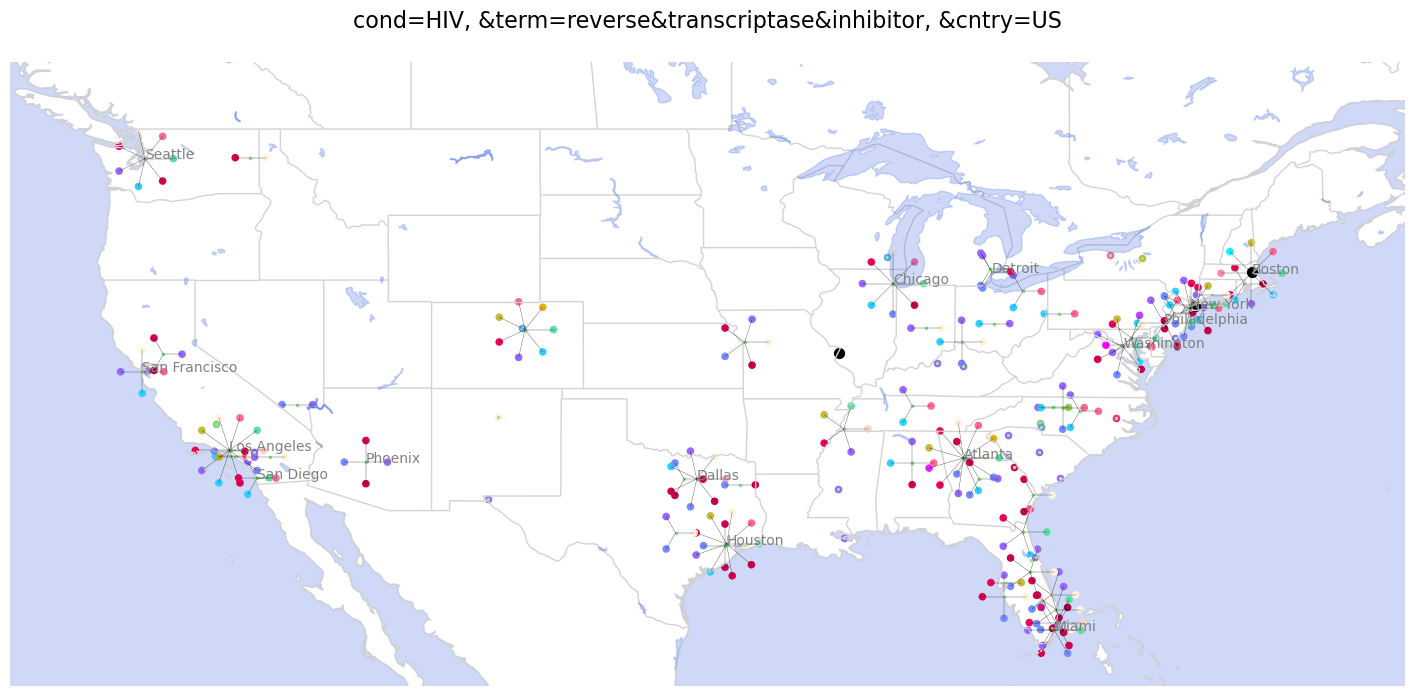

In [62]:
plt.figure(figsize=(18, 16))

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([merged_df.lng.min()*1.05, merged_df.lng.max()*.9, merged_df.lat.min()*.9, merged_df.lat.max()], ccrs.Geodetic())
ax.coastlines(color='lightgray')
ax.add_feature(cfeature.BORDERS, color='lightgray')
ax.add_feature(states_provinces, edgecolor='lightgray')
ax.add_feature(cfeature.OCEAN, color='royalblue', alpha=0.25)
ax.add_feature(cartopy.feature.LAKES, color='royalblue', alpha=0.25)

for i in range(len(jit)):
    plt.scatter(jit[i][0][0][0], jit[i][0][0][1], color = revised[i].Color, s = 20)
    plt.scatter(revised[i].lng, revised[i].lat, color='lightgreen', marker='o', s=2, label='Central Points')
    
for i in range(len(revised)):
    plt.plot((list(revised[i].lng), jit[i][0][0][0]), (list(revised[i].lat),jit[i][0][0][1]), c ='k', alpha=1, linewidth=.2 )


for i in range(len(pop_city)):
    plt.text(pop_lng[i], pop_lat[i], str(pop_city[i]), color='gray')
    
plt.title(cond+', '+term+', '+location+'\n', fontsize=16)
plt.axis('Off')
# plt.set_aspect('equal')  # Setting the aspect ratio to be equal


plt.scatter(x, y, color = 'k', s = 50)

# legend = merged_df['NCT Number'].value_counts().sort_values().plot(kind = 'barh', color = colors, align='center', width=0.6)
# axes[1].legend
# axes[1].grid(alpha=0.2)
# axes[1].set_xlabel('Number of Sites')
# fig.tight_layout()
plt.show()

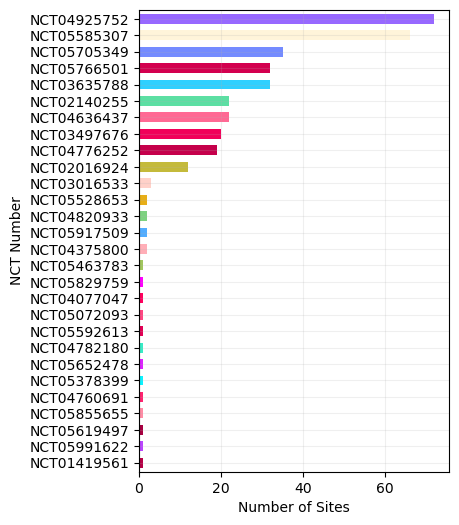

In [63]:
plt.figure(figsize=(4, 6))

legend = merged_df['NCT Number'].value_counts().sort_values().plot(kind = 'barh', color = colors, align='center', width=0.6)
plt.legend
plt.grid(alpha=0.2)
plt.xlabel('Number of Sites')
# fig.tight_layout()
plt.show()

In [64]:
merged_df.Interventions[merged_df['NCT Number'] == 'NCT04925752'].reset_index().iloc[0].tolist()[1].split('|')

['Drug: Oral Lenacapavir (LEN)',
 'Drug: F/TDF',
 'Drug: Sub-cutaneous (SC) Lenacapavir (LEN)',
 'Drug: Placebo SC LEN',
 'Drug: PTM F/TDF',
 'Drug: PTM Oral LEN',
 'Drug: F/TAF (for US participants only)']

In [65]:
merged_df.Interventions[merged_df['NCT Number'] == 'NCT05585307'].reset_index().iloc[0].tolist()[1].split('|')

['Drug: GS-5894',
 'Drug: B/F/TAF',
 'Drug: Standard of Care (Substudy 01)',
 'Drug: GS-1720',
 'Drug: Standard of Care (Substudy 02)']

In [66]:
merged_df.Interventions[merged_df['NCT Number'] == 'NCT05705349'].reset_index().iloc[0].tolist()[1].split('|')

['Drug: DOR/ISL',
 'Drug: BIC/FTC/TAF',
 'Drug: Placebo to DOR/ISL',
 'Drug: Placebo to BIC/FTC/TAF']

In [67]:
nct = pd.DataFrame(merged_df['NCT Number'].value_counts())
nct.head()

,count
NCT Number,
NCT04925752,72
NCT05585307,66
NCT05705349,35
NCT05766501,32
NCT03635788,32


In [68]:
nct.index[:5]

Index(['NCT04925752', 'NCT05585307', 'NCT05705349', 'NCT05766501',
       'NCT03635788'],
      dtype='object', name='NCT Number')

In [69]:
intervention = []

for i in nct.index[:5]:
    intervention.append(merged_df.Interventions[merged_df['NCT Number'] == i].reset_index().iloc[0].tolist()[1].split('|'))

In [70]:
summary = pd.DataFrame({'NCT Number':nct.index[:5], 'Interventions':intervention})
summary['Interventions'] = [','.join(map(str, l)) for l in summary['Interventions']]

In [71]:
pd.set_option('display.max_colwidth', 0)

summary

,NCT Number,Interventions
0,NCT04925752,"Drug: Oral Lenacapavir (LEN),Drug: F/TDF,Drug: Sub-cutaneous (SC) Lenacapavir (LEN),Drug: Placebo SC LEN,Drug: PTM F/TDF,Drug: PTM Oral LEN,Drug: F/TAF (for US participants only)"
1,NCT05585307,"Drug: GS-5894,Drug: B/F/TAF,Drug: Standard of Care (Substudy 01),Drug: GS-1720,Drug: Standard of Care (Substudy 02)"
2,NCT05705349,"Drug: DOR/ISL,Drug: BIC/FTC/TAF,Drug: Placebo to DOR/ISL,Drug: Placebo to BIC/FTC/TAF"
3,NCT05766501,Drug: DOR/ISL
4,NCT03635788,"Drug: Standard of Care (SOC) Oral ART,Drug: Oral RPV,Drug: Oral CAB,Drug: RPV-LA Loading Dose,Drug: CAB-LA Loading Dose,Drug: RPV-LA Maintenance Dose,Drug: CAB-LA Maintenance Dose"


In [72]:
summary.Interventions[0].split(',')

['Drug: Oral Lenacapavir (LEN)',
 'Drug: F/TDF',
 'Drug: Sub-cutaneous (SC) Lenacapavir (LEN)',
 'Drug: Placebo SC LEN',
 'Drug: PTM F/TDF',
 'Drug: PTM Oral LEN',
 'Drug: F/TAF (for US participants only)']